<a href="https://colab.research.google.com/github/hdavidoff/datathon23/blob/hannah/from_new_art_prices_to_tweakable_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
artworks = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Artwork.parquet.gzip')
artists = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Artist.parquet.gzip')

import io
import matplotlib.pyplot as plt
import requests
from PIL import Image

def display_artwork(url):
    response = requests.get(url)
    image = Image.open(io.BytesIO(response.content))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

def get_AI_gen(url):
    response = requests.get(url)
    image = Image.open(io.BytesIO(response.content))
    return image

In [10]:
!pip install git+https://github.com/LIAAD/yake
import yake
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')   # Required for tokenization
nltk.download('wordnet') # Required for lemmatization
nltk.download('omw-1.4')


import numpy as np
from wordcloud import WordCloud
from collections import Counter
# Instantiate
lemmatizer = WordNetLemmatizer()


## code source: https://medium.com/@y.s.yoon/nlp-illustration-in-python-extracting-keywords-e9c4a6e0a267

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/LIAAD/yake to /tmp/pip-req-build-mktge430
  Running command git clone --filter=blob:none --quiet https://github.com/LIAAD/yake /tmp/pip-req-build-mktge430
  Resolved https://github.com/LIAAD/yake to commit 8d71d94ded93fb77f1361f62e5264f19b9c91cd7
  Preparing metadata (setup.py) ... done


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [11]:
## first pre-process
## lowercase
## remove punctuation and number
## tokenize
## remove stop words
## lemmatization
nltk.download('stopwords')
# Exclusion list of punctuations and numbers
exclist = string.punctuation + string.digits + '-'+'’'+'”'+'–'
# Print the exclusion list
print(exclist)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~0123456789-’”–


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
## count number of matching words between name and price name
def count_match_words(text1,text2):
  tokens1 = word_tokenize(text1)
  tokens2 = word_tokenize(text2)
  count_match = [1  for token in tokens1 if token in tokens2]
  sum_match = sum(count_match)
  if len(tokens1) != 0:
    perc_match = (sum_match/len(tokens1))*100
  else:
    perc_match = np.nan

  return perc_match

# NEW SOURCE PRICES

Upload the .csv to wherever you're running this

In [18]:
art_with_prices = pd.read_csv('/content/artworks_with_prices_v2.csv')
## first get all with non-null prices and summaries
art_with_ps = art_with_prices.loc[(art_with_prices['price_name'].notnull())]
art_with_ps.count()

id              7190
name            7190
url             7190
image_url       7190
artist          7190
rating          3092
summary         4702
year             185
medium           381
location         445
name_english    7190
artist_name     7190
price           7190
price_name      7190
dtype: int64

In [19]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
stop_words.append('du')
stop_words.append('au')
stop_words.append('de')
stop_words.append('à')
stop_words.append('la')

# Exclusion list of punctuations and numbers
exclist = string.punctuation + string.digits + '-'+'’'+'”'+'–'
# Print the exclusion list
print(exclist)


def clean_text(text):
  text = text.lower()

  text = text.translate(str.maketrans("","",exclist))

 
  # Tokenization
  tokens = word_tokenize(text)

  # Lemmatization
  tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
  # Remove stop words
  tokens = [token for token in tokens if token not in stop_words]

  #special replace
  st_replace = ['saint']
  tokens = [token if token not in st_replace else 'st' for token in tokens ]
    
  # Join tokens
  clean_text = " ".join(tokens)
    
  # Return the output
  return clean_text

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~0123456789-’”–


Clean the text from the name and price_name columns for matching.

In [20]:
for_summ = art_with_ps

In [21]:
for_summ['name_english'] = for_summ.apply(lambda row: clean_text(row['name_english']),axis=1)
for_summ['price_name'] = for_summ.apply(lambda row: clean_text(row['price_name']),axis=1)
for_summ.head(10)

<ipython-input-21-1644ce1da6e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_summ['name_english'] = for_summ.apply(lambda row: clean_text(row['name_english']),axis=1)
<ipython-input-21-1644ce1da6e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_summ['price_name'] = for_summ.apply(lambda row: clean_text(row['price_name']),axis=1)


,id,name,url,image_url,artist,rating,summary,year,medium,location,name_english,artist_name,price,price_name
1,1,Starry Night,http://wikigallery.org/wiki/painting_9698/Vinc...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,NaN,NaN,NaN,NaN,starry night,Vincent Van Gogh,450.0,starry night
3,3,A Group of Cottages,http://wikigallery.org/wiki/painting_132642/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,6.0,Stoneywell is a National Trust property in Ulv...,NaN,NaN,NaN,group cottage,Vincent Van Gogh,7500.0,group eight portrait sketch selfportrait vince...
4,4,A Pair of Shoes,http://wikigallery.org/wiki/painting_94630/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,Toms (stylized as TOMS) is a for-profit compan...,NaN,NaN,NaN,pair shoe,Vincent Van Gogh,10000000.0,pair shoe
5,5,Blossoming Almond Tree,http://wikigallery.org/wiki/painting_14446/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,10.0,Almond Blossoms is a group of several painting...,1890.0,0.0,Van Gogh Museum,blossoming almond tree,Vincent Van Gogh,50.0,almond blossom glass
6,6,Branches with Almond Blossom,http://wikigallery.org/wiki/painting_133105/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,Almond Blossoms is a group of several painting...,1890.0,0.0,Van Gogh Museum,branch almond blossom,Vincent Van Gogh,50.0,almond blossom glass
8,8,Agostina Segatori Sitting In The Cafe Du Tambo...,http://wikigallery.org/wiki/painting_14352/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,Agostina Segatori Sitting in the Café du Tambo...,1887.0,0.0,Van Gogh Museum,agostina segatori sitting cafe tambourin,Vincent Van Gogh,669500.0,peasant woman halffigure sitting
9,9,The Bedroom,http://wikigallery.org/wiki/painting_14451/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,10.0,In the Bedroom is a 2001 American independent ...,NaN,NaN,NaN,bedroom,Vincent Van Gogh,100.0,artist bedroom
10,10,Peach Trees in Blossom,http://wikigallery.org/wiki/painting_133052/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,NaN,Peach Trees in Blossom is an 1899 painting by ...,NaN,NaN,NaN,peach tree blossom,Vincent Van Gogh,110500.0,olive tree yellow sky vincent van gogh picture...
11,11,Nude Woman Reclining,http://wikigallery.org/wiki/painting_9927/Vinc...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,7.0,The Naked Maja or The Nude Maja (Spanish: La m...,NaN,0.0,Museo del Prado,nude woman reclining,Vincent Van Gogh,4470000.0,boerin met een kind op haar schoot peasant wom...
13,13,Landscape Under A Stormy Sky,http://wikigallery.org/wiki/painting_10015/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,10.0,NaN,NaN,NaN,NaN,landscape stormy sky,Vincent Van Gogh,332500.0,sien umbrella girl


In [26]:
for_summ['match_perc'] = for_summ.apply(lambda row: count_match_words(row['name_english'],row['price_name']),axis=1)
for_summ.head()

<ipython-input-26-6cfd2555e2a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_summ['match_perc'] = for_summ.apply(lambda row: count_match_words(row['name_english'],row['price_name']),axis=1)


,id,name,url,image_url,artist,rating,summary,year,medium,location,name_english,artist_name,price,price_name,match_perc
1,1,Starry Night,http://wikigallery.org/wiki/painting_9698/Vinc...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,NaN,NaN,NaN,NaN,starry night,Vincent Van Gogh,450.0,starry night,100.000000
3,3,A Group of Cottages,http://wikigallery.org/wiki/painting_132642/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,6.0,Stoneywell is a National Trust property in Ulv...,NaN,NaN,NaN,group cottage,Vincent Van Gogh,7500.0,group eight portrait sketch selfportrait vince...,50.000000
4,4,A Pair of Shoes,http://wikigallery.org/wiki/painting_94630/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,Toms (stylized as TOMS) is a for-profit compan...,NaN,NaN,NaN,pair shoe,Vincent Van Gogh,10000000.0,pair shoe,100.000000
5,5,Blossoming Almond Tree,http://wikigallery.org/wiki/painting_14446/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,10.0,Almond Blossoms is a group of several painting...,1890.0,0.0,Van Gogh Museum,blossoming almond tree,Vincent Van Gogh,50.0,almond blossom glass,33.333333
6,6,Branches with Almond Blossom,http://wikigallery.org/wiki/painting_133105/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,Almond Blossoms is a group of several painting...,1890.0,0.0,Van Gogh Museum,branch almond blossom,Vincent Van Gogh,50.0,almond blossom glass,66.666667


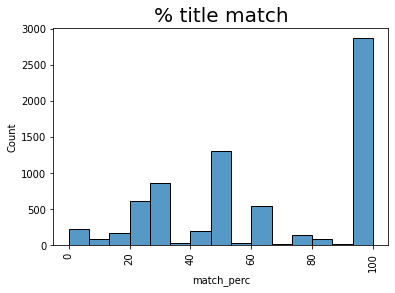

In [27]:
import seaborn as sns
sns.histplot(x=for_summ['match_perc'])
plt.xticks(rotation='vertical')
plt.title("% title match", fontsize = 20)
plt.show()

In [28]:
#set threshold for percentage max minimum
min_match = 40
clean = for_summ.loc[for_summ['match_perc']>=min_match]
clean.count()

id              5213
name            5213
url             5213
image_url       5213
artist          5213
rating          2317
summary         3611
year             145
medium           300
location         341
name_english    5213
artist_name     5213
price           5213
price_name      5213
match_perc      5213
dtype: int64